## Clustering & PCA Assignment

**Overview**<br>
HELP International is an international humanitarian NGO that is committed to fighting poverty and providing the people of backward countries with basic amenities and relief during the time of disasters and natural calamities. It runs a lot of operational projects from time to time along with advocacy drives to raise awareness as well as for funding purposes.

 

After the recent funding programmes, they have been able to raise around $ 10 million. Now the CEO of the NGO needs to decide how to use this money strategically and effectively. The significant issues that come while making this decision are mostly related to choosing the countries that are in the direst need of aid. 

The steps are broadly:

1. Read and understand the data
2. Clean the data
3. Prepare the data for modelling
4. Modelling
5. Final analysis and reco

## 1. Read and understand the data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Standardize the data for PCA
from sklearn.preprocessing import StandardScaler

# Importing PCA
from sklearn.decomposition import PCA
# Importing Incremental PCA
from sklearn.decomposition import IncrementalPCA

# Importing K-Means
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Importing Hierarchical Clustering Library
from scipy.cluster.hierarchy import linkage, dendrogram, cut_tree

In [2]:
# read the dataset
country_df = pd.read_csv("G:/UpGrad/ML-1/Assignment/DataSet/Country-data.csv", sep=",", encoding="ISO-8859-1", header=0)
country_df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [3]:
country_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
country       167 non-null object
child_mort    167 non-null float64
exports       167 non-null float64
health        167 non-null float64
imports       167 non-null float64
income        167 non-null int64
inflation     167 non-null float64
life_expec    167 non-null float64
total_fer     167 non-null float64
gdpp          167 non-null int64
dtypes: float64(7), int64(2), object(1)
memory usage: 13.1+ KB


## 2. Clean the data

Convert exports, health and imports spending from percentage values to actual values of their GDPP.

In [4]:
# Converting exports, health and imports spending percentages to actual/absolute values.
country_df['exports'] = country_df['exports']*country_df['gdpp']/100
country_df['health'] = country_df['health']*country_df['gdpp']/100
country_df['imports'] = country_df['imports']*country_df['gdpp']/100

In [5]:
country_df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,55.30,41.9174,248.297,1610,9.44,56.2,5.82,553
1,Albania,16.6,1145.20,267.8950,1987.740,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,1712.64,185.9820,1400.440,12900,16.10,76.5,2.89,4460
3,Angola,119.0,2199.19,100.6050,1514.370,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100,1.44,76.8,2.13,12200


In [6]:
country_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
country       167 non-null object
child_mort    167 non-null float64
exports       167 non-null float64
health        167 non-null float64
imports       167 non-null float64
income        167 non-null int64
inflation     167 non-null float64
life_expec    167 non-null float64
total_fer     167 non-null float64
gdpp          167 non-null int64
dtypes: float64(7), int64(2), object(1)
memory usage: 13.1+ KB


In [7]:
country_df.isna().sum()

country       0
child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
dtype: int64

## 3. Prepare the data for modelling

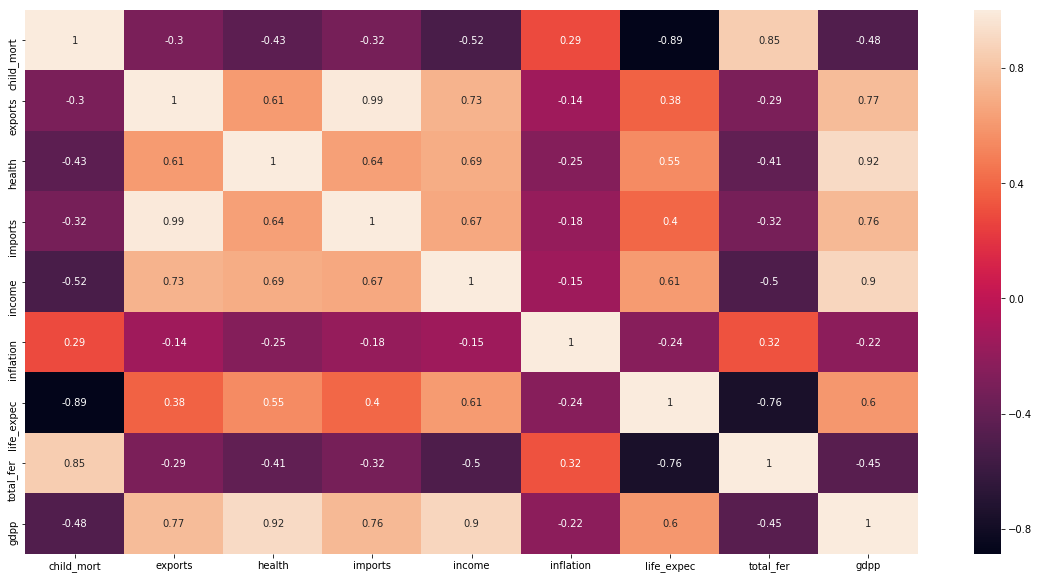

In [8]:
# We need to check the correlated variable so we have to plot the correlation metrix
plt.figure(figsize = (20,10))
sns.heatmap(country_df.corr(), annot = True)

In [9]:
# We have to drop the country column because final matrix would only contain the numeric column
country_df1 = country_df.drop(['country'],axis=1)
country_df1.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,90.2,55.30,41.9174,248.297,1610,9.44,56.2,5.82,553
1,16.6,1145.20,267.8950,1987.740,9930,4.49,76.3,1.65,4090
2,27.3,1712.64,185.9820,1400.440,12900,16.10,76.5,2.89,4460
3,119.0,2199.19,100.6050,1514.370,5900,22.40,60.1,6.16,3530
4,10.3,5551.00,735.6600,7185.800,19100,1.44,76.8,2.13,12200


In [10]:
# Now we have selected the data we need to standardize the data.
standard_scaler = StandardScaler()
country_df_scaled = standard_scaler.fit_transform(country_df1)
country_df_scaled

C:\Users\ph\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\ph\Anaconda3\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


array([[ 1.29153238, -0.4110113 , -0.56503989, ..., -1.61909203,
         1.90288227, -0.67917961],
       [-0.5389489 , -0.35019096, -0.43921769, ...,  0.64786643,
        -0.85997281, -0.48562324],
       [-0.27283273, -0.31852577, -0.48482608, ...,  0.67042323,
        -0.0384044 , -0.46537561],
       ...,
       [-0.37231541, -0.36146329, -0.53848844, ...,  0.28695762,
        -0.66120626, -0.63775406],
       [ 0.44841668, -0.39216643, -0.55059641, ..., -0.34463279,
         1.14094382, -0.63775406],
       [ 1.11495062, -0.38395214, -0.54049845, ..., -2.09278484,
         1.6246091 , -0.62954556]])

In [11]:
# Now we have to perform PCA for that we need to import PCA
pca = PCA(random_state = 42)

In [12]:
# Apply PCA
pca.fit(country_df_scaled)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=42,
  svd_solver='auto', tol=0.0, whiten=False)

In [13]:
# List of PCA components
pca.components_

array([[-0.31639186,  0.34288671,  0.358535  ,  0.34486492,  0.38004113,
        -0.14308531,  0.34385651, -0.30284224,  0.39998795],
       [ 0.47626735,  0.39731091,  0.1550529 ,  0.37078075,  0.12838448,
         0.22126089, -0.36981973,  0.4597152 ,  0.2006241 ],
       [-0.15001225, -0.03057367, -0.07570322, -0.07217386,  0.14576421,
         0.94841868,  0.19675173, -0.07783431,  0.01033941],
       [-0.14805195,  0.44942527, -0.59971228,  0.46179779, -0.15480592,
        -0.00762798, -0.01839465, -0.21392805, -0.36477239],
       [ 0.1019948 , -0.03853829, -0.49319984, -0.2527867 ,  0.79407469,
        -0.13642345, -0.15404105, -0.02033568,  0.08750149],
       [ 0.19658519, -0.03891112,  0.18069888, -0.01217988, -0.03814681,
         0.10840284, -0.58600986, -0.75390075,  0.04538167],
       [ 0.76126725, -0.01366973, -0.06461567,  0.02718244, -0.02311312,
        -0.02207663,  0.58120846, -0.27314534, -0.04402264],
       [ 0.00644411, -0.05526371,  0.43007213,  0.1311355 ,  0

In [14]:
# Check the Variance Ratio
pca.explained_variance_ratio_

array([5.89372984e-01, 1.84451685e-01, 9.91147170e-02, 6.07227801e-02,
       3.02917253e-02, 2.45982702e-02, 9.39743701e-03, 1.55641971e-03,
       4.93981394e-04])

<BarContainer object of 9 artists>

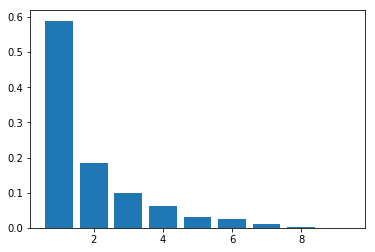

In [15]:
# Bar Graph for Variance Ratio
plt.bar(range(1,len(pca.explained_variance_ratio_)+1), pca.explained_variance_ratio_)

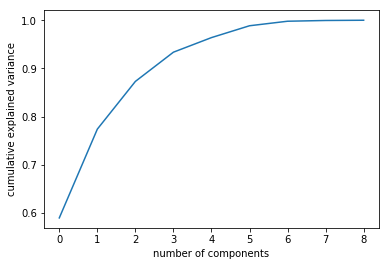

In [16]:
# Making the screen plot
var_cumu = np.cumsum(pca.explained_variance_ratio_)
plt.plot(var_cumu)
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()

From the above figure we observe that 90% variance with 3 Principal Components.

In [17]:
# Making a dataframe out of it for convenience
colnames = list(country_df1.columns)
pcs_df = pd.DataFrame({ 'Feature':colnames,'PC1':pca.components_[0],'PC2':pca.components_[1],'PC3':pca.components_[2]})
pcs_df

,Feature,PC1,PC2,PC3
0,child_mort,-0.316392,0.476267,-0.150012
1,exports,0.342887,0.397311,-0.030574
2,health,0.358535,0.155053,-0.075703
3,imports,0.344865,0.370781,-0.072174
4,income,0.380041,0.128384,0.145764
5,inflation,-0.143085,0.221261,0.948419
6,life_expec,0.343857,-0.369820,0.196752
7,total_fer,-0.302842,0.459715,-0.077834
8,gdpp,0.399988,0.200624,0.010339


C:\Users\ph\Anaconda3\lib\site-packages\seaborn\axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


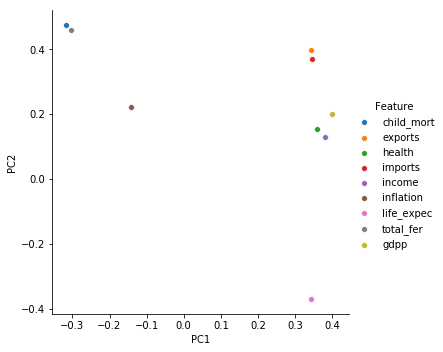

In [18]:
# Plotting the data
# Visualise the first 2 components
sns.pairplot(data=pcs_df, x_vars=["PC1"], y_vars=["PC2"], hue = "Feature", size=5)

Most of the variables have a good loading score on the PC1. Child_Mort and Total_fer is well explained by the PC2

In [19]:
# Using Incremental PCA
pca_fin = IncrementalPCA(n_components=3)

In [20]:
# train the original data on the 3 principal components
df_train_pca = pca_fin.fit_transform(country_df_scaled)
df_train_pca.shape

(167, 3)

In [21]:
# Take the transpose of PC metrix with help of this we can create the new matrix
pc_trans = np.transpose(df_train_pca)

In [22]:
# Now create the newer matrix
row = list(country_df['country'])
pcs_df2 = pd.DataFrame({'country':row,'PC1':pc_trans[0],'PC2':pc_trans[1],'PC3':pc_trans[2]})
pcs_df2.head()

,country,PC1,PC2,PC3
0,Afghanistan,-2.637442,1.469038,-0.541359
1,Albania,-0.022277,-1.431896,-0.020701
2,Algeria,-0.457626,-0.673301,0.961867
3,Angola,-2.724520,2.174583,0.606687
4,Antigua and Barbuda,0.649849,-1.024374,-0.250103


### OutLier Analysis

{'whiskers': [<matplotlib.lines.Line2D at 0x27654988e10>,
 'caps': [<matplotlib.lines.Line2D at 0x276549d6400>,
 'boxes': [<matplotlib.lines.Line2D at 0x27654988f28>],
 'medians': [<matplotlib.lines.Line2D at 0x276549d6940>],
 'fliers': [<matplotlib.lines.Line2D at 0x27654b56c50>],
 'means': []}

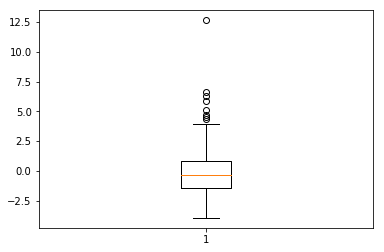

In [23]:
# Outlier treatment on Principal component 1
plt.boxplot(pcs_df2.PC1)

{'whiskers': [<matplotlib.lines.Line2D at 0x27654a50f98>,
 'caps': [<matplotlib.lines.Line2D at 0x27654a45cf8>,
 'boxes': [<matplotlib.lines.Line2D at 0x27654a50b00>],
 'medians': [<matplotlib.lines.Line2D at 0x27654e74da0>],
 'fliers': [<matplotlib.lines.Line2D at 0x27654b38390>],
 'means': []}

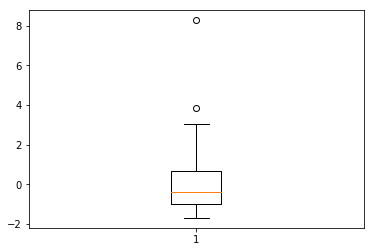

In [24]:
# Outlier treatment on Principal component 2
plt.boxplot(pcs_df2.PC2)

{'whiskers': [<matplotlib.lines.Line2D at 0x27654e955c0>,
 'caps': [<matplotlib.lines.Line2D at 0x27654e95c50>,
 'boxes': [<matplotlib.lines.Line2D at 0x27654e95198>],
 'medians': [<matplotlib.lines.Line2D at 0x27654e9f320>],
 'fliers': [<matplotlib.lines.Line2D at 0x27654e9f668>],
 'means': []}

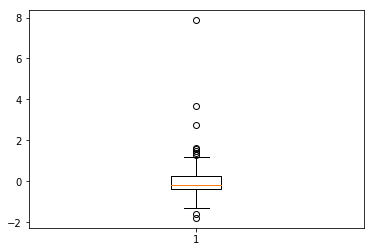

In [25]:
# Outlier treatment on Principal component 3
plt.boxplot(pcs_df2.PC3)

In [26]:
# removing outliers

# outlier treatment for PC1
Q1 = pcs_df2.PC1.quantile(0.05)
Q3 = pcs_df2.PC1.quantile(0.95)
IQR = Q3 - Q1
pcs_df2 = pcs_df2[(pcs_df2.PC1 >= Q1) & (pcs_df2.PC1 <= Q3)]

# outlier treatment for PC2
Q1 = pcs_df2.PC2.quantile(0.05)
Q3 = pcs_df2.PC2.quantile(0.95)
IQR = Q3 - Q1
pcs_df2 = pcs_df2[(pcs_df2.PC2 >= Q1) & (pcs_df2.PC2 <= Q3)]

# outlier treatment for PC3
Q1 = pcs_df2.PC3.quantile(0.05)
Q3 = pcs_df2.PC3.quantile(0.95)
IQR = Q3 - Q1
pcs_df2 = pcs_df2[(pcs_df2.PC3 >= Q1) & (pcs_df2.PC3 <= Q3)]

In [27]:
pcs_df2.shape

(119, 4)

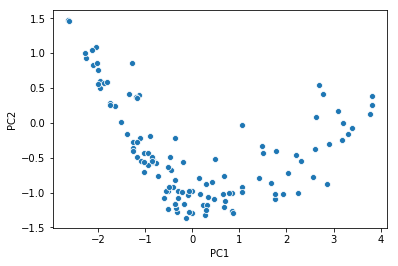

In [28]:
sns.scatterplot(x='PC1',y='PC2',data=pcs_df2)

## 4. Modelling

### K-Means Clustering

In [29]:
df_k = standard_scaler.fit_transform(pcs_df2.drop(['country'], axis = 1))

### Silhouette Analysis

$$\text{silhouette score}=\frac{p-q}{max(p,q)}$$

$p$ is the mean distance to the points in the nearest cluster that the data point is not a part of

$q$ is the mean intra-cluster distance to all the points in its own cluster.

* The value of the silhouette score range lies between -1 to 1. 

* A score closer to 1 indicates that the data point is very similar to other data points in the cluster, 

* A score closer to -1 indicates that the data point is not similar to the data points in its cluster.

In [30]:
# silhouette analysis
sse_ = []
for k in range (2,10):
    kmeans = KMeans(n_clusters = k).fit(df_k)
    sse_.append([k, silhouette_score(df_k, kmeans.labels_)])

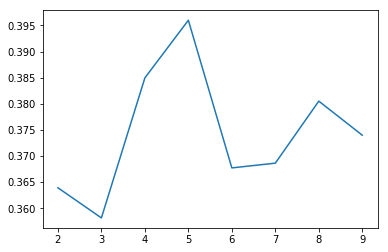

In [31]:
plt.plot(pd.DataFrame(sse_)[0], pd.DataFrame(sse_)[1])

### Finding the Optimal Number of Clusters
- SSD

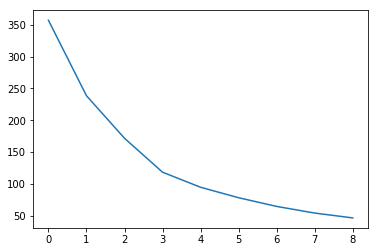

In [32]:
# elbow-curve/SSD
ssd = []
for num_clusters in list(range(1,10)):
    kmeans = KMeans(n_clusters = num_clusters, max_iter=50)
    kmeans.fit(df_k)
    
    ssd.append(kmeans.inertia_)
    
# plot the SSDs for each n_clusters
# ssd
plt.plot(ssd)

eLbow is formed at around 3-7 clusters.

In [33]:
# K-means with k=5 cluster
kmeans5 = KMeans(n_clusters = 5, max_iter = 50)
kmeans5.fit(df_k)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=50,
    n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [34]:
df_k_new = pcs_df2
df_k_new.index = pd.RangeIndex(len(df_k_new.index))
df_km = pd.concat([df_k_new, pd.Series(kmeans5.labels_)], axis=1)
df_km.columns = ['country', 'PC1', 'PC2', 'PC3', 'Cluster_ID']
df_km.head()

,country,PC1,PC2,PC3,Cluster_ID
0,Afghanistan,-2.637442,1.469038,-0.541359,1
1,Algeria,-0.457626,-0.673301,0.961867,4
2,Antigua and Barbuda,0.649849,-1.024374,-0.250103,0
3,Armenia,-0.332692,-1.274517,0.176636,0
4,Australia,3.180362,-0.250785,-0.116877,3


In [35]:
df_km['Cluster_ID'].value_counts()

0    54
3    21
1    19
4    17
2     8
Name: Cluster_ID, dtype: int64

Each Cluster has a good number of counteries associated with it.
We need to do some more Data Visualisation

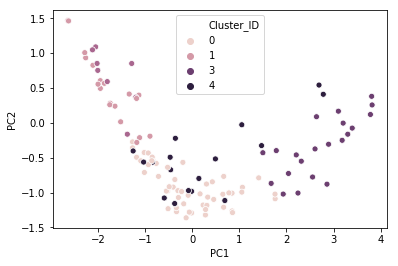

In [36]:
# Now visuallising the cluster on the original Principal Components
sns.scatterplot(x = 'PC1', y = 'PC2', hue = 'Cluster_ID', data = df_km)

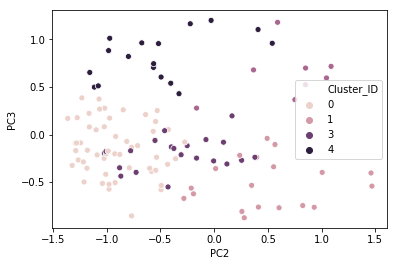

In [37]:
sns.scatterplot(x = 'PC2', y = 'PC3', hue = 'Cluster_ID', data = df_km)

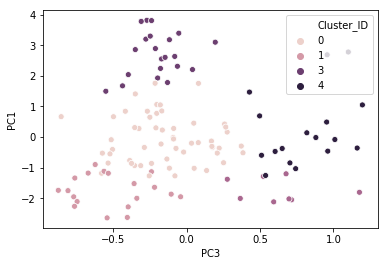

In [38]:
sns.scatterplot(x = 'PC3', y = 'PC1', hue = 'Cluster_ID', data = df_km)

We notice that some distinct clusters are being formed.

In [39]:
# Create the cluster means of various variables
df_km1 = pd.merge(country_df, df_km, on = 'country')
df_km2 = df_km1[['country','child_mort','exports','imports','health','income',
                 'inflation','life_expec','total_fer','gdpp','Cluster_ID']]
child_cluster = pd.DataFrame(df_km2.groupby(['Cluster_ID']).child_mort.mean())
exports_cluster = pd.DataFrame(df_km2.groupby(['Cluster_ID']).exports.mean())
imports_cluster = pd.DataFrame(df_km2.groupby(['Cluster_ID']).imports.mean())
health_cluster = pd.DataFrame(df_km2.groupby(['Cluster_ID']).health.mean())
income_cluster = pd.DataFrame(df_km2.groupby(['Cluster_ID']).income.mean())
inflation_cluster = pd.DataFrame(df_km2.groupby(['Cluster_ID']).inflation.mean())
life_cluster = pd.DataFrame(df_km2.groupby(['Cluster_ID']).life_expec.mean())
fer_cluster = pd.DataFrame(df_km2.groupby(['Cluster_ID']).total_fer.mean())
gdpp_cluster = pd.DataFrame(df_km2.groupby(['Cluster_ID']).gdpp.mean())

df_1 = pd.concat([pd.Series([0,1,2,3,4]), child_cluster, exports_cluster, imports_cluster, health_cluster,
                 income_cluster, inflation_cluster, life_cluster, fer_cluster, gdpp_cluster], axis = 1)

df_1.columns = ['Cluster_ID', 'Child_Mortality', 'Exports', 'Imports', 'Health_Spending', 'Income', 
                'Inflation', 'Life_Expectancy', 'Total_Fertility', 'GDP_per_Capita']

df_1

,Cluster_ID,Child_Mortality,Exports,Imports,Health_Spending,Income,Inflation,Life_Expectancy,Total_Fertility,GDP_per_Capita
0,0,21.327778,3197.866906,3549.747687,476.537426,12019.629630,4.389981,73.307407,2.276296,6915.592593
1,1,65.084211,787.408095,969.381895,145.439137,3983.157895,6.446842,61.657895,4.266842,2025.947368
2,2,65.250000,1367.857750,895.048500,134.866550,6203.750000,18.137500,65.537500,4.487500,2753.500000
3,3,4.795238,14001.761905,13929.619048,3758.980952,35566.666667,1.147381,80.376190,1.759048,37209.523810
4,4,19.964706,6649.636094,4599.561059,472.387471,23580.588235,13.935294,72.976471,2.145882,11205.411765


We observe that Child mortality, Income, Inflation and GDP per capita are good predictors for the development of a country. On cross-checking with the original Principal components that we drew, these 4 components had good scores. Hence we can say that they are a good source of information for the Clustering Process.Let's visualise the clusters along these.

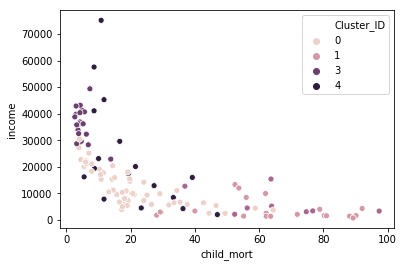

In [40]:
sns.scatterplot(x='child_mort',y='income',hue='Cluster_ID',data=df_km2)

In [41]:
# Check Clustering process worked well or not
df_km2[df_km2['Cluster_ID']==0]

,country,child_mort,exports,imports,health,income,inflation,life_expec,total_fer,gdpp,Cluster_ID
2,Antigua and Barbuda,10.3,5551.00000,7185.800000,735.6600,19100,1.440,76.8,2.13,12200,0
3,Armenia,18.1,669.76000,1458.660000,141.6800,6700,7.770,73.3,1.69,3220,0
9,Bangladesh,49.4,121.28000,165.244000,26.6816,2440,7.140,70.4,2.33,758,0
10,Barbados,14.2,6320.00000,7792.000000,1275.2000,15300,0.321,76.7,1.78,16000,0
12,Belize,18.8,2525.88000,2495.500000,225.6800,7880,1.140,71.4,2.71,4340,0
13,Bhutan,42.7,926.50000,1541.260000,113.3600,6420,5.990,72.1,2.38,2180,0
14,Bolivia,46.6,815.76000,679.140000,95.8320,5410,8.780,71.6,3.20,1980,0
16,Brazil,19.8,1198.40000,1321.600000,1009.1200,14500,8.410,74.2,1.80,11200,0
17,Bulgaria,10.8,3433.68000,3625.200000,469.9080,15300,1.110,73.9,1.57,6840,0
18,Cambodia,44.4,425.22600,467.670000,44.6448,2520,3.120,66.1,2.88,786,0


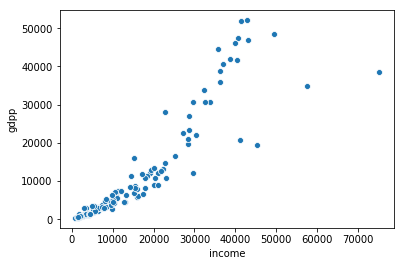

In [42]:
# K-Means Clustering has done the satisfactory job
sns.scatterplot(x = 'income', y = 'gdpp', data = df_km2)

From the clusters it is observed that cluster 3 and 4 have pretty low values of the 4 indicators that we chose. Hence these are the countries that we need to focus.

### Hierarchical Clustering

In [43]:
Z = linkage(df_k, method = 'complete')

In [44]:
Z

array([[2.30000000e+01, 1.06000000e+02, 3.45684897e-02, 2.00000000e+00],
       [3.50000000e+01, 1.05000000e+02, 8.52751754e-02, 2.00000000e+00],
       [2.00000000e+01, 7.50000000e+01, 1.06797148e-01, 2.00000000e+00],
       [3.40000000e+01, 4.70000000e+01, 1.12222375e-01, 2.00000000e+00],
       [1.60000000e+01, 1.07000000e+02, 1.23604641e-01, 2.00000000e+00],
       [8.50000000e+01, 1.20000000e+02, 1.26640492e-01, 3.00000000e+00],
       [2.00000000e+00, 6.60000000e+01, 1.28167277e-01, 2.00000000e+00],
       [5.90000000e+01, 9.00000000e+01, 1.38823134e-01, 2.00000000e+00],
       [5.00000000e+01, 1.15000000e+02, 1.42251562e-01, 2.00000000e+00],
       [4.30000000e+01, 8.70000000e+01, 1.48798089e-01, 2.00000000e+00],
       [3.30000000e+01, 8.10000000e+01, 1.77267192e-01, 2.00000000e+00],
       [1.20000000e+01, 1.21000000e+02, 1.79245228e-01, 3.00000000e+00],
       [3.00000000e+00, 2.20000000e+01, 1.80671678e-01, 2.00000000e+00],
       [3.90000000e+01, 6.40000000e+01, 1.86101391e

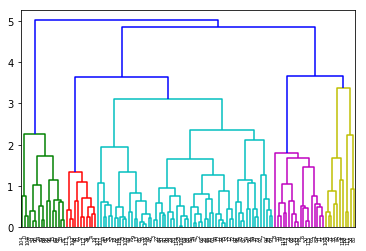

In [45]:
d = dendrogram(Z)

In [46]:
c = pd.Series(cut_tree(Z, n_clusters = 5).reshape(-1,))
df_hc = pd.concat([pcs_df2, c], axis = 1)
df_hc.columns = ['country', 'PC1', 'PC2', 'PC3', 'Cluster_ID']

In [47]:
df_hc.head()

,country,PC1,PC2,PC3,Cluster_ID
0,Afghanistan,-2.637442,1.469038,-0.541359,0
1,Algeria,-0.457626,-0.673301,0.961867,1
2,Antigua and Barbuda,0.649849,-1.024374,-0.250103,2
3,Armenia,-0.332692,-1.274517,0.176636,2
4,Australia,3.180362,-0.250785,-0.116877,3


In [48]:
df_hc1 = pd.merge(country_df,df_hc,on='country')
df_hc2 = df_hc1 [['country','child_mort','exports','imports','health','income',
                  'inflation','life_expec','total_fer','gdpp','Cluster_ID']]
df_hc2.head()

,country,child_mort,exports,imports,health,income,inflation,life_expec,total_fer,gdpp,Cluster_ID
0,Afghanistan,90.2,55.30,248.297,41.9174,1610,9.44,56.2,5.82,553,0
1,Algeria,27.3,1712.64,1400.440,185.9820,12900,16.10,76.5,2.89,4460,1
2,Antigua and Barbuda,10.3,5551.00,7185.800,735.6600,19100,1.44,76.8,2.13,12200,2
3,Armenia,18.1,669.76,1458.660,141.6800,6700,7.77,73.3,1.69,3220,2
4,Australia,4.8,10276.20,10847.100,4530.8700,41400,1.16,82.0,1.93,51900,3


In [49]:
df_hc2['Cluster_ID'].value_counts()

2    63
1    18
0    16
4    11
3    11
Name: Cluster_ID, dtype: int64

In [50]:
df_hc2[df_hc2['Cluster_ID']==2]

,country,child_mort,exports,imports,health,income,inflation,life_expec,total_fer,gdpp,Cluster_ID
2,Antigua and Barbuda,10.3,5551.00000,7185.800000,735.6600,19100,1.440,76.8,2.13,12200,2
3,Armenia,18.1,669.76000,1458.660000,141.6800,6700,7.770,73.3,1.69,3220,2
7,Bahamas,13.8,9800.00000,12236.000000,2209.2000,22900,-0.393,73.8,1.86,28000,2
9,Bangladesh,49.4,121.28000,165.244000,26.6816,2440,7.140,70.4,2.33,758,2
10,Barbados,14.2,6320.00000,7792.000000,1275.2000,15300,0.321,76.7,1.78,16000,2
12,Belize,18.8,2525.88000,2495.500000,225.6800,7880,1.140,71.4,2.71,4340,2
13,Bhutan,42.7,926.50000,1541.260000,113.3600,6420,5.990,72.1,2.38,2180,2
14,Bolivia,46.6,815.76000,679.140000,95.8320,5410,8.780,71.6,3.20,1980,2
17,Bulgaria,10.8,3433.68000,3625.200000,469.9080,15300,1.110,73.9,1.57,6840,2
18,Cambodia,44.4,425.22600,467.670000,44.6448,2520,3.120,66.1,2.88,786,2


In [51]:
df_hc2[df_hc2['Cluster_ID']==1]

,country,child_mort,exports,imports,health,income,inflation,life_expec,total_fer,gdpp,Cluster_ID
1,Algeria,27.3,1712.6400,1400.440,185.982,12900,16.10,76.5,2.89,4460,1
6,Azerbaijan,39.2,3171.1200,1208.880,343.392,16000,13.80,69.1,1.92,5840,1
8,Bahrain,8.6,14386.5000,10536.300,1028.790,41100,7.44,76.0,2.16,20700,1
11,Belarus,5.5,3099.4200,3889.350,338.283,16200,15.10,70.4,1.49,6030,1
16,Brazil,19.8,1198.4000,1321.600,1009.120,14500,8.41,74.2,1.80,11200,1
21,Chile,8.7,4863.3000,4037.700,1026.840,19400,8.96,79.1,1.88,12900,1
50,Indonesia,33.3,755.7300,696.640,81.171,8430,15.30,69.9,2.48,3110,1
51,Iran,19.3,1593.3200,1266.820,365.680,17400,15.90,74.5,1.76,6530,1
55,Jamaica,18.1,1464.8400,2321.280,225.108,8000,9.81,74.7,2.17,4680,1
65,Libya,16.6,7937.6000,5094.100,469.480,29600,14.20,76.1,2.41,12100,1


In [52]:
df_hc2[df_hc2['Cluster_ID']==0]

,country,child_mort,exports,imports,health,income,inflation,life_expec,total_fer,gdpp,Cluster_ID
0,Afghanistan,90.2,55.3000,248.297,41.9174,1610,9.44,56.2,5.82,553,0
15,Botswana,52.5,2768.6000,3257.550,527.0500,13300,8.92,57.1,2.88,6350,0
24,Comoros,88.2,126.8850,397.573,34.6819,1410,3.87,65.9,4.75,769,0
33,Eritrea,55.2,23.0878,112.306,12.8212,1420,11.60,61.7,4.61,482,0
39,Gambia,80.3,133.7560,239.974,31.9778,1660,4.30,65.5,5.71,562,0
59,Kenya,62.2,200.1690,324.912,45.9325,2480,2.09,62.8,4.37,967,0
62,Lao,78.9,403.5600,562.020,50.9580,3980,9.20,63.8,3.15,1140,0
64,Liberia,89.3,62.4570,302.802,38.5860,700,5.47,60.8,5.02,327,0
67,Madagascar,62.2,103.2500,177.590,15.5701,1390,8.79,60.8,4.60,413,0
77,Namibia,56.0,2480.8200,3150.330,351.8820,8460,3.56,58.6,3.60,5190,0


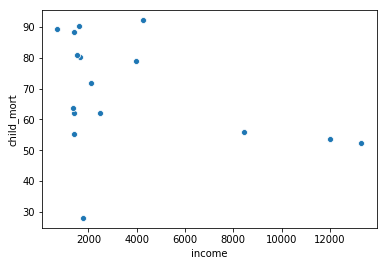

In [53]:
df_hc_final = df_hc2[df_hc2['Cluster_ID'] == 0]
sns.scatterplot(x = 'income', y = 'child_mort', data = df_hc_final)

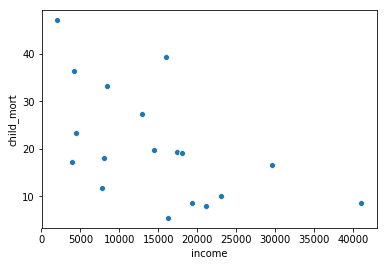

In [54]:
df_hc_final = df_hc2[df_hc2['Cluster_ID'] == 1]
sns.scatterplot(x = 'income', y = 'child_mort', data = df_hc_final)

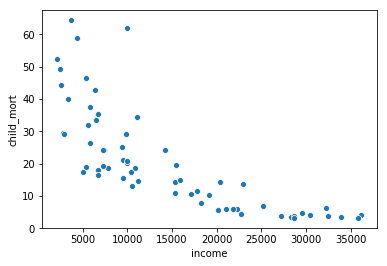

In [55]:
df_hc_final = df_hc2[df_hc2['Cluster_ID'] == 2]
sns.scatterplot(x = 'income', y = 'child_mort', data = df_hc_final)

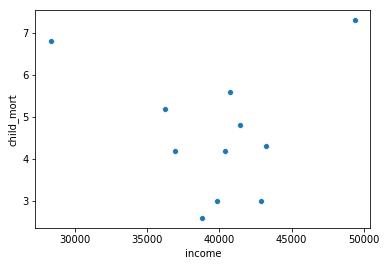

In [56]:
df_hc_final = df_hc2[df_hc2['Cluster_ID'] == 3]
sns.scatterplot(x = 'income', y = 'child_mort', data = df_hc_final)

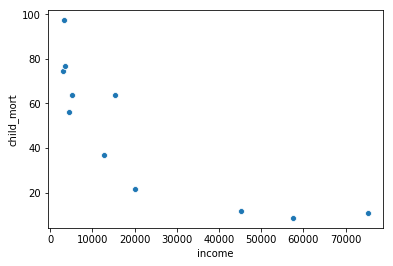

In [57]:
df_hc_final = df_hc2[df_hc2['Cluster_ID'] == 4]
sns.scatterplot(x = 'income', y = 'child_mort', data = df_hc_final)

#### Final result : 

We use the clusters formed during K-means clustering to find the countries that we require since Hierarchical clustering is not showing proper clusters here. For K-means part, we got Cluster 3 and 4 might be the ones which has a proper need of aid.

#### Observation 1 :

In the Solution K-Means and Hierarchical don't produce the identical insights.
This will because of the way the principal components and the final number of Clusters are choosen.

#### Observation 2 :
For outliers that we removed before clustering took place, you can take any approach  to include them in the final list of countries that you'd focus on. Either reassign them to the  clusters that were formed and see if Cluster 3 and Cluster 4 have any more countries. Or use  one variable from some of the main indicators to bin the entire 167 countries. Like if you take  GDPP, keep the bin limits as 0-1700, 1700-3200,3200-6000,6000-13000 and >13000. The bin  limits are decided on the basis of the approximate gdpp means that we got for the 5 clusters.  Categorise all the countries from the original dataset within these limits and then take all the  countries less than 1700 as the cutoff.Similarly, proceed for the 2nd variable.Any other logically  thought out approach also works.

#### Observation 3 :
As mentioned previously, you can follow any approach to find the final list of countries.  Either you can use the binning approach, or use the outlier assign approach where you assign  each outlier that you got to the given cluster means. Here we'll take a look at one such easier  approach where we use the binning approach for one of the indicators which show a good  variability among the different clusters.

In [58]:
# Converting Exports, Imports and Health spending percentages to absolute values.
country_df['exports'] = country_df['exports']*country_df['gdpp']/100
country_df['imports'] = country_df['imports']*country_df['gdpp']/100
country_df['health'] = country_df['health']*country_df['gdpp']/100

In [59]:
country_df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,305.809,231.803222,1373.08241,1610,9.44,56.2,5.82,553
1,Albania,16.6,46838.680,10956.905500,81298.56600,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,76383.744,8294.797200,62459.62400,12900,16.10,76.5,2.89,4460
3,Angola,119.0,77631.407,3551.356500,53457.26100,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,677222.000,89750.520000,876667.60000,19100,1.44,76.8,2.13,12200


In [60]:
#Let's use the binning with gdpp first to see the list of countries which might be important.
#The upper limit that we got from the clustering process was 1700.
#let's filter the complete dataset with 1700 as the cut-off limit for gdpp.

country_df_new = country_df[country_df['gdpp']<=1700]
country_df_new.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,305.809000,231.803222,1373.08241,1610,9.440,56.2,5.82,553
12,Bangladesh,49.4,919.302400,202.246528,1252.54952,2440,7.140,70.4,2.33,758
17,Benin,111.0,1367.462320,235.571240,2137.37808,1820,0.885,61.8,5.36,758
25,Burkina Faso,116.0,634.800000,222.841250,978.65000,1430,6.810,57.9,5.87,575
26,Burundi,93.6,47.598012,61.898760,209.17512,764,12.300,57.7,6.26,231


In [61]:
country_df_new.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000
mean,84.808333,2643.301355,552.032545,4090.813267,2209.229167,8.849688,60.789583,4.552500,847.583333
std,37.864382,3001.648592,623.716784,4734.536249,1134.428833,5.849055,7.282776,1.382764,384.444824
min,17.200000,10.639970,61.798184,6.432789,609.000000,0.885000,32.100000,1.270000,231.000000
25%,61.350000,455.326723,190.223676,987.284405,1390.000000,4.080000,57.175000,3.465000,551.500000
50%,82.050000,1059.313785,299.500904,2117.841040,1900.000000,8.215000,61.250000,4.875000,758.000000
75%,108.250000,4167.909500,750.797375,5546.501000,2857.500000,12.150000,66.125000,5.370000,1205.000000
max,208.000000,12355.920000,3108.573000,20856.665000,4490.000000,23.600000,73.100000,7.490000,1630.000000


In [62]:
#From the clustering process we got child_mortality to be at least 76 for the most downtrodden cluster. 
#Let's see how many countries lie within that range

country_df_new1 = country_df_new[country_df_new['child_mort']>=76]
country_df_new2 = country_df_new1[country_df_new1['income']<3200]
len(country_df_new2)

23

In [63]:
#We've got 23 countries now, let's use the describe function to see how they're aligned again.
country_df_new2.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000
mean,113.743478,1362.607524,307.026061,2265.584792,1444.913043,7.125435,56.065217,5.463478,627.173913
std,30.255681,1860.069606,332.930869,2929.594779,587.515796,5.428622,6.853042,0.953232,288.989407
min,80.300000,47.598012,61.898760,209.175120,609.000000,0.885000,32.100000,3.300000,231.000000
25%,90.400000,375.815205,132.507499,773.184255,974.000000,3.420000,55.300000,5.080000,432.500000
50%,109.000000,634.800000,222.841250,1348.653880,1410.000000,5.450000,57.300000,5.340000,562.000000
75%,119.500000,1207.595520,284.765207,2486.408380,1740.000000,10.020000,58.750000,6.010000,733.000000
max,208.000000,7531.304000,1519.479000,13825.890000,2690.000000,20.800000,65.900000,7.490000,1310.000000


### The Final List of Countries

In [64]:
country_df_new2

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,305.809000,231.803222,1373.08241,1610,9.440,56.2,5.82,553
17,Benin,111.0,1367.462320,235.571240,2137.37808,1820,0.885,61.8,5.36,758
25,Burkina Faso,116.0,634.800000,222.841250,978.65000,1430,6.810,57.9,5.87,575
26,Burundi,93.6,47.598012,61.898760,209.17512,764,12.300,57.7,6.26,231
28,Cameroon,108.0,3809.742000,880.359300,4633.47000,2660,1.910,57.3,5.11,1310
31,Central African Republic,149.0,234.720880,79.168568,527.12740,888,2.010,47.5,5.21,446
32,Chad,150.0,2960.961120,364.487877,3500.04915,1930,6.390,56.5,6.59,897
36,Comoros,88.2,975.745650,266.703811,3057.33637,1410,3.870,65.9,4.75,769
37,"Congo, Dem. Rep.",116.0,458.495160,88.240796,553.31776,609,20.800,57.5,6.54,334
40,Cote d'Ivoire,111.0,7531.304000,788.852000,6444.77200,2690,5.390,56.3,5.27,1220


#### Final Remarks :

**Major focus should be given to the countries mentioned above**<br>